In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from tensorflow.keras.layers import Bidirectional

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train=np.load("./drive/My Drive/audio_train.npy")
test=np.load("./drive/My Drive/audio_test.npy")

In [5]:
train_labels=pd.read_csv("./drive/My Drive/labels_train.csv")
sample_submission=pd.read_csv("./drive/My Drive/sample_submission.csv")

In [ ]:
train_labels

,id,label
0,0,5
1,1,1
2,2,1
3,3,0
4,4,9
...,...,...
937,937,9
938,938,1
939,939,1
940,940,5


In [6]:
label = list(train_labels['label'])

y_train = np.empty([len(train),1])
for i in range(len(label)):
  y_train[i] = label[i]
y_train = np.array(y_train, dtype='uint8')

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)

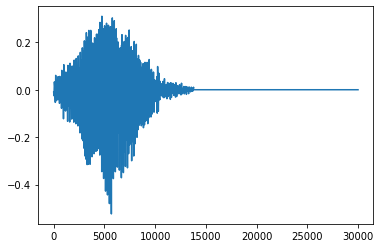

In [ ]:
plt.plot(train[2])

In [ ]:
print(train_labels.label.unique())

[5 1 0 9 4 6 7 3 8]


In [ ]:
print(sample_submission.label.unique())

[ 1  6  3  7  4  8  9  5  2  0 10]


In [ ]:
print(np.shape(test)[1])

30000


In [7]:
verbose, epochs, batch_size = 0, 10, 32

In [8]:
n_timesteps, n_features, n_outputs = train.shape[0], train.shape[1], train_labels.shape[0]

In [9]:
n_timesteps

942

In [10]:
train.shape[0],train.shape[1]

(942, 30000)

In [11]:
train1=np.reshape(train,(train.shape[0],500,60))
train1.shape

(942, 500, 60)

In [12]:
test1=np.reshape(test,(test.shape[0],500,60))
test1.shape

(558, 500, 60)

In [13]:
train_labels.shape

(942, 2)

In [14]:
train.shape[1]

30000

In [38]:
from scipy import misc
import sklearn
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
train_x, test_x, train_y, test_y = train_test_split(train1, y_train, random_state = 101, test_size=0.25)

In [53]:
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=200, BATCH_SIZE=128):
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [54]:
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional, ELU
from keras.models import Sequential
from keras.utils import Sequence
from keras.layers import LSTM

NO

In [55]:
model = models.Sequential()
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(500,60)))
model.add(Dense(500))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(60)))
model.add(Dense(100))
model.add(ELU())
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))


In [56]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_14 (Bidirectio (None, 500, 20)           5680      
_________________________________________________________________
dense_19 (Dense)             (None, 500, 500)          10500     
_________________________________________________________________
dropout_12 (Dropout)         (None, 500, 500)          0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 120)               269280    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               12100     
_________________________________________________________________
elu_5 (ELU)                  (None, 100)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)              

no

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [58]:
n_folds=4
epochs=200
batch_size=128

#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(train_x, train_y, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/200
5/5 [==============================] - 2s 321ms/step - loss: 2.2705 - accuracy: 0.1033 - val_loss: 2.2498 - val_accuracy: 0.0938
Epoch 2/200
5/5 [==============================] - 1s 112ms/step - loss: 2.1620 - accuracy: 0.1559 - val_loss: 2.1929 - val_accuracy: 0.1562
Epoch 3/200
5/5 [==============================] - 1s 112ms/step - loss: 2.0983 - accuracy: 0.1891 - val_loss: 2.1292 - val_accuracy: 0.2031
Epoch 4/200
5/5 [==============================] - 1s 112ms/step - loss: 2.0172 - accuracy: 0.2242 - val_loss: 2.0357 - val_accuracy: 0.2344
Epoch 5/200
5/5 [==============================] - 1s 111ms/step - loss: 1.9807 - accuracy: 0.2487 - val_loss: 2.0583 - val_accuracy: 0.2188
Epoch 6/200
5/5 [==============================] - 1s 111ms/step - loss: 1.8787 - accuracy: 0.2925 - val_loss: 1.9616 - val_accuracy: 0.2344
Epoch 7/200
5/5 [==============================] - 1s 114ms/step - loss: 1.8811 - accuracy: 0.2662 - val_loss: 1.9414 - val_accuracy:

In [59]:
pred = model.predict(test1)

In [60]:
np.argmax(pred[1])

5

In [61]:
predLabel = np.empty([len(test),2],dtype=int)
for i in range(len(pred)):
  predLabel[i][0] = np.int(i)
  predLabel[i][1] = np.int(np.argmax(pred[i]))


In [62]:
df = pd.DataFrame(predLabel, columns= ['id', 'label'])

df.to_csv (r'haiqzhu10.csv', index = False, header=True)

In [ ]:
sample_submission

,id,label
0,0,1
1,1,6
2,2,3
3,3,7
4,4,4
...,...,...
553,553,6
554,554,0
555,555,2
556,556,9


In [ ]:
df

,id,label
0,0,5
1,1,9
2,2,4
3,3,1
4,4,4
...,...,...
553,553,1
554,554,5
555,555,5
556,556,7
